# PokerIQ Tests

In [4]:
from pokeriq import Card, Hand, Deck, Player, Simulation, EquitySolver

In [6]:
# Testing generators
cardOne = Card.generate('Js')
cardTwo = Card('s',11)
print(cardOne.equals(cardTwo))

sequenceOne = [Card('s',9), Card('d',10), Card('d',11)]
sequenceTwo = Card.generateSet(('9s','Td','Jd'))
print(Card.sequenceToString(sequenceOne) == Card.sequenceToString(sequenceTwo))

rangeOne = Card.generateSetofSets({('As','Ah'), ('As','Ad'), ('As','Ac'), ('Ah','Ad'), ('Ah','Ac'), ('Ad','Ac'), 
                                    ('Ks','Kh'), ('Ks','Kd'), ('Ks','Kc'), ('Kh','Kd'), ('Kh','Kc'), ('Kd','Kc'), 
                                    ('Qs','Qh'), ('Qs','Qd'), ('Qs','Qc'), ('Qh','Qd'), ('Qh','Qc'), ('Qd','Qc'), 
                                    ('As','Ks'), ('Ah','Kh'), ('Ad','Kd'), ('Ac','Kc'), ('As','Kh'), ('As','Kd'), 
                                    ('As','Kc'), ('Ah','Ks'), ('Ah','Kd'), ('Ah','Kc'), ('Ad','Ks'), ('Ad','Kh'), 
                                    ('Ad','Kc'), ('Ac','Ks'), ('Ac','Kh'), ('Ac','Kd')})
rangeTwo = EquitySolver.generateRange({'AA', 'KK', 'QQ', 'AKs', 'AKo'})
toStringListOne = [Card.sequenceToString(hand) for hand in rangeOne]
toStringListTwo = [Card.sequenceToString(hand) for hand in rangeTwo]
print(set(toStringListOne) == set(toStringListTwo))

True
True
True


In [12]:
# Testing hand equity (1)
solver = EquitySolver()
solver.addPlayers(2)
solver.defineHole(1, Card.generateSet({'Ah','Ac'}))
solver.defineHole(2, Card.generateSet({'Kc','Ks'}))
solver.calculateHandEquity(trials=10000)
print(solver.toString())

____________________
Board Cards: 

____________________
Player 1 |  ♣A ♥A | 81.79999999999262%
Player 2 |  ♠K ♣K | 17.64999999999969%
Chop | 0.5500000000000002%
____________________



**Solver.** _Source: PokerAI (iPhone)_

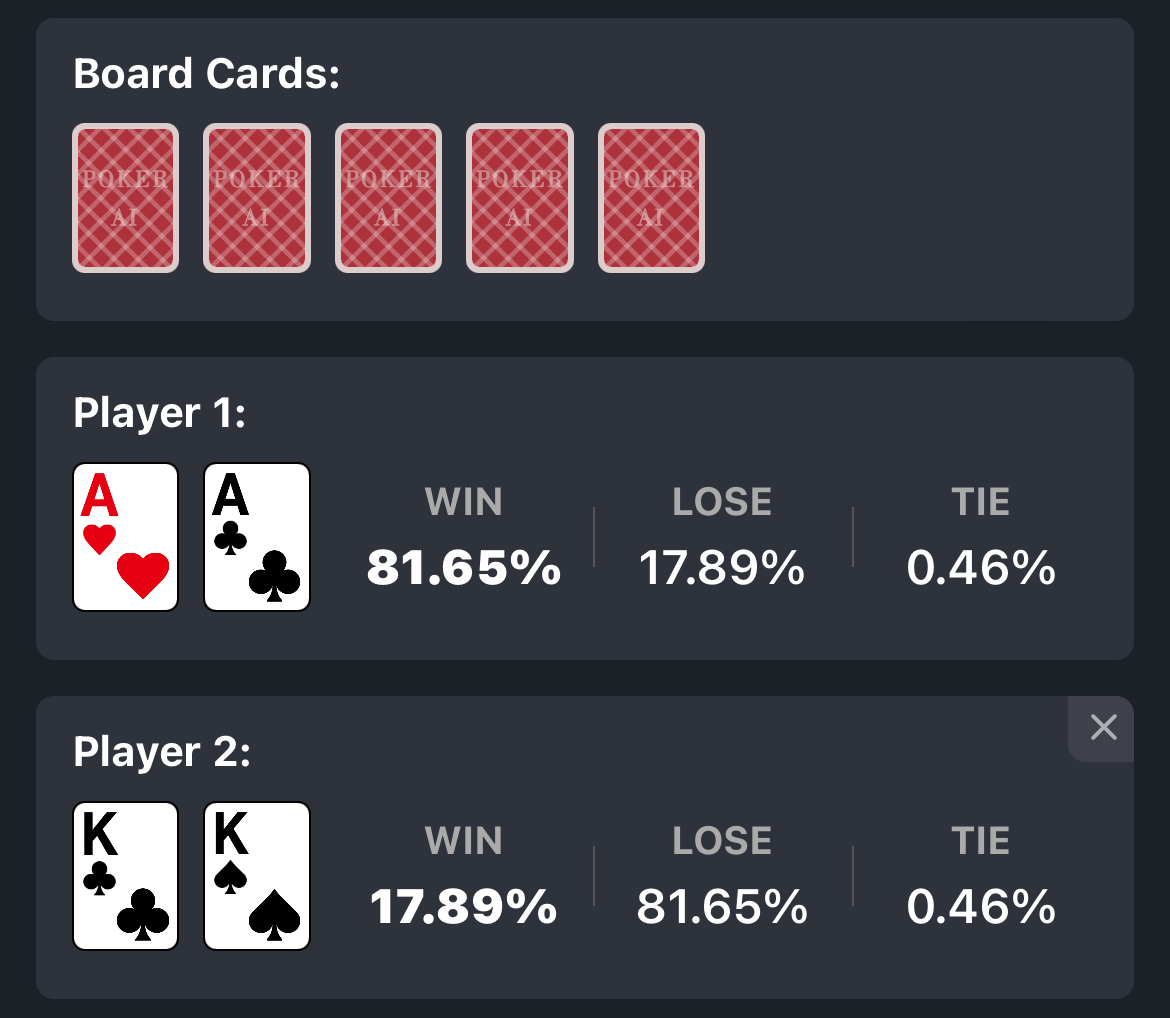

In [31]:
# Testing hand equity (2)
solver = EquitySolver()
solver.addPlayers(3)
solver.defineHole(1, Card.generateSet({'Ah','5h'}))
solver.defineHole(2, Card.generateSet({'Tc','Ts'}))
solver.defineBoard(Card.generateSet(['6h','7h','9s']))
solver.calculateHandEquity(trials=10000)
print(solver.toString())

____________________
Board Cards: 
 ♥6 ♥7 ♠9
____________________
Player 1 |  ♥5 ♥A | 45.60999999999661%
Player 2 |  ♠T ♣T | 41.10999999999711%
Player 3 |  | 14.620000000000022%
Chop | 0.22%
____________________



**Solver.** _Source: PokerAI (iPhone)_

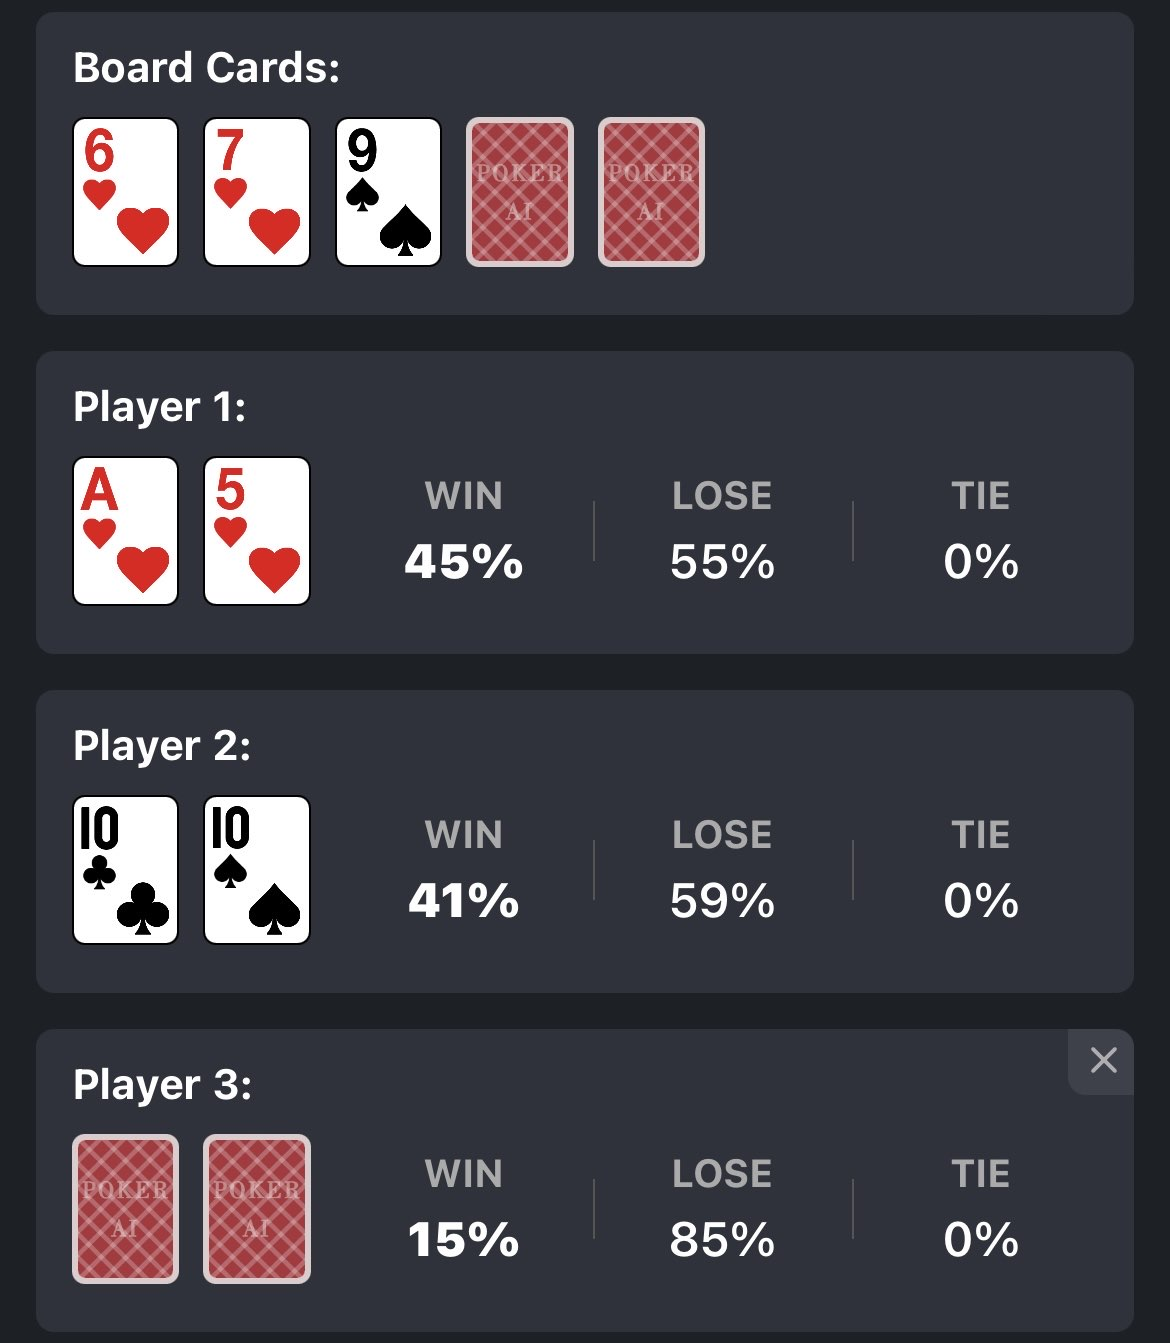

In [17]:
# Testing hand equity (3)
solver = EquitySolver()
solver.addPlayers(3)
solver.defineHole(1, Card.generateSet({'7c','7s'}))
solver.defineHole(2, Card.generateSet({'Ts','8s'}))
solver.defineHole(3, Card.generateSet({'Tc','8c'}))
solver.defineBoard(Card.generateSet(['2h','7h','9s','6s']))
solver.calculateHandEquity(trials=10000)
print(solver.toString())

____________________
Board Cards: 
 ♥2 ♥7 ♠9 ♠6
____________________
Player 1 |  ♠7 ♣7 | 24.379999999998947%
Player 2 |  ♠T ♠8 | 75.6199999999933%
Player 3 |  ♣8 ♣T | 58.95999999999514%
Chop | 0%
____________________



**Solver.** _Source: PokerAI (iPhone)_

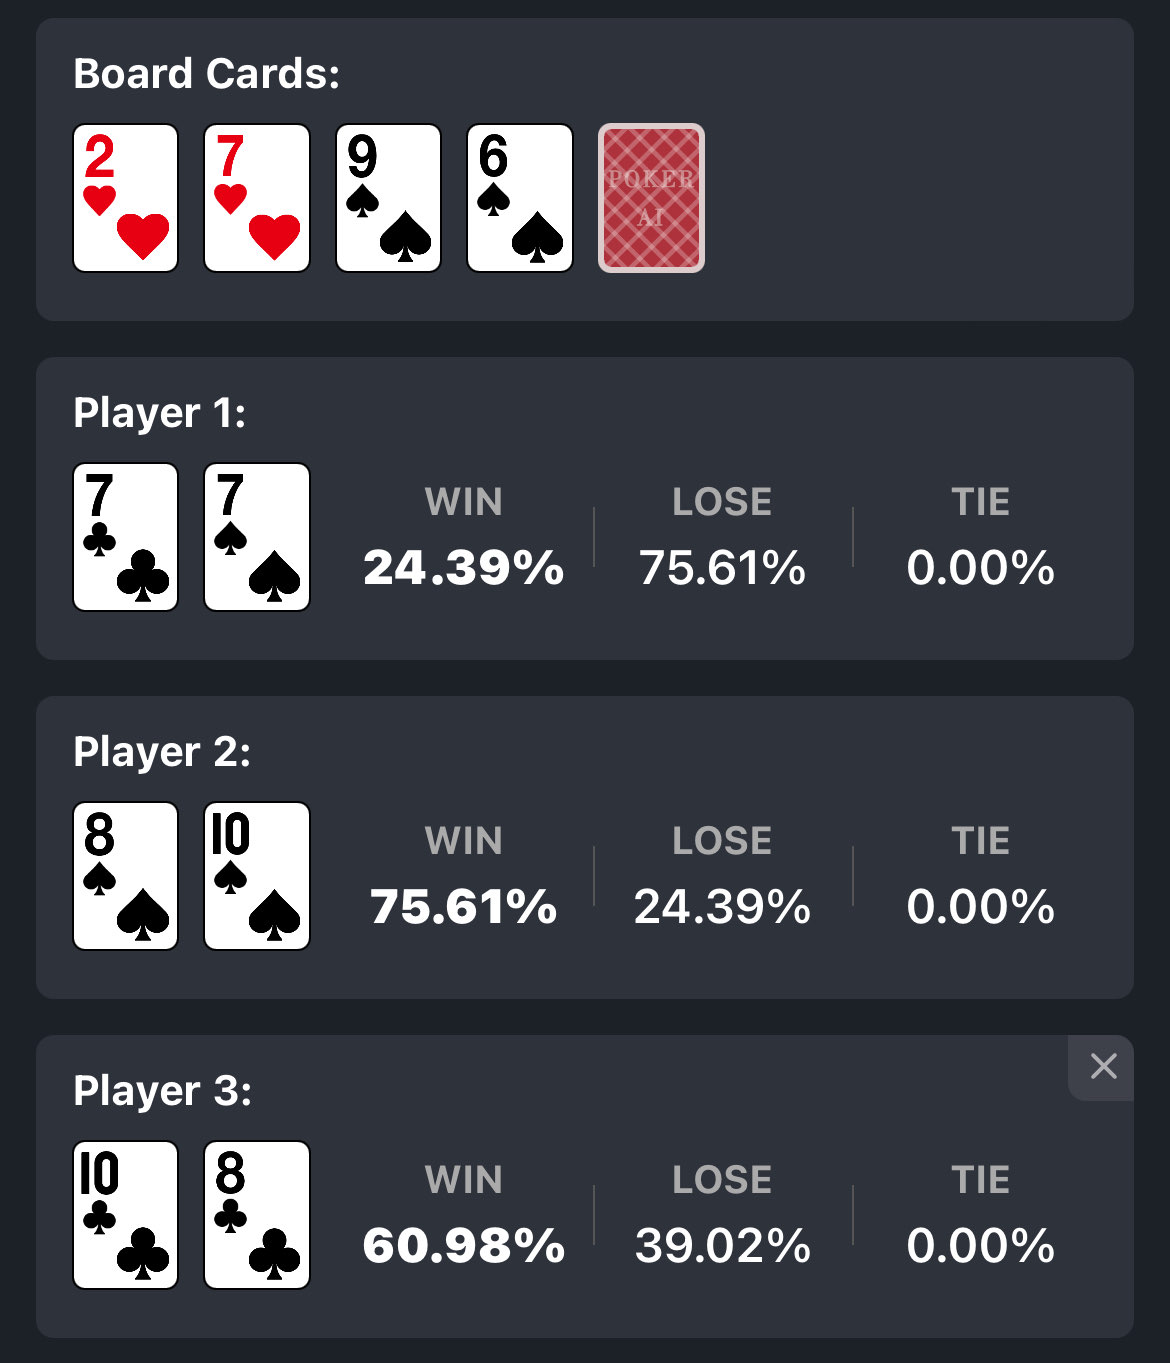

In [56]:
# Testing range equity (results difficult to verify beyond sanity checking)
myHand = [Card.generateSet(('Ks','Kc'))]
fiveBetRange = EquitySolver.generateRange({'AA', 'KK', 'QQ', 'AKs', 'AKo'})
equities, message = EquitySolver.calculateRangeEquity(myHand, fiveBetRange)
print(message)

____________________
BoardCards: 

____________________
Range 1 | 48.338235294117695%
Range 2 | 33.37941176470591%
CHOP | 18.282352941176487%
____________________



Approximate math:\
KK vs AA ~ 18% equity | 6 combos\
KK vs KK ~ 2% equity, 98% chop | 6 combos (blockers not considered)\
KK vs QQ ~ 82% equity | 6 combos\
KK vs AK ~ 68% equity | 16 combos (blockers not considered)\

Wins: 0.8(6) + 0.7(16) + 0.2(6) ~ 17/34 ~ 50%\
Loses: 0.8(6) + 0.3(16) + 0.2(6) ~ 11/34 ~ 32%\
Chops: 1(6) ~ 6/34 ~ 18%\

Seems approximately correct for this basic range comparison!